

# Project: Investigate a Dataset - [TMDB-MOVIES]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The Tmdb dataset contains information about 10,000 movies collected from The Movies Database(TMDb).
It contains these columns - 

 • id - contains the id of each movie 
 • imdb_id - international movies database id 
 • popularity - how popular the movie is 
 • budget - summary of intended expenditure for each movie 
 • revenue - total income on each movie 
 • original_title - title of the movie
 • cast - actors & actresses 
 • homepage - website link 
 • director 
 • tagline
 • keywords
 • overview - summary
 • runtime - duration
 • genres - categories 
 • production_companies
 • release_date
 • vote_count
 • vote_average
 • release_year
 • budget_adj
 • revenue_adj

### Question(s) for Analysis
1. Has the Number of Movies produced per year increased over time?
2. Which genre has the most movie production in 2015?
3. Will the Revenue on movies determine their popularity?
4. Does the duration of movies affect their ratings?

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0;

In [ ]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In [40]:
# read the file using pandas
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [41]:
# rows and columns
df.shape

(10866, 21)

In [42]:
# information about the data(total rows, missing values, datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

## Convert The Release Date and Release Year columns into Date format

In [46]:
# convert release date column to date format
df['release_date'] = pd.to_datetime(df.release_year, infer_datetime_format = True, format='%Y-%M-%D')

In [47]:
# convert release year column to year format
df['release_year'] = pd.to_datetime(df.release_year, format='%Y')

## Remove the ' | ' character from the genres column

In [48]:
# remove the pipe charater from the genres column 
df_genres = df.assign(genres = df.genres.str.split("|")).explode("genres")

In [50]:
#confirm the shaoe of the data
df_genres.shape

(26983, 21)

In [45]:
# confirm if genres are now separated
df_genres.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1
 ## Has the Number of Movies Produced per year increased over time?

In [ ]:
# create a count of movies release per year 
movies_per_year = df.groupby('release_year')['original_title'].count()

Text(0,0.5,'Count')

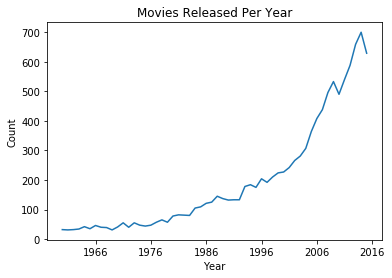

In [36]:
# plot a lineplot to show the increase in movie production 
plt.plot(movies_per_year)
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')

### Research Question 2  
## Which Genre has the most movie production in 2015?

In [ ]:
# subset the dataframe for movies released in 2015
movies_in_2015  = df_genres.loc[(df.release_year == '2015')]
movies_in_2015  = movies_in_2015.groupby(['release_year', 'genres'])['genres'].count()

In [37]:
# movies released only in 2015
movies_in_2015

release_year  genres         
2015-01-01    Action             107
              Adventure           69
              Animation           39
              Comedy             162
              Crime               51
              Documentary         57
              Drama              260
              Family              44
              Fantasy             33
              History             15
              Horror             125
              Music               33
              Mystery             42
              Romance             57
              Science Fiction     86
              TV Movie            20
              Thriller           171
              War                  9
              Western              6
Name: genres, dtype: int64

Text(0.5,1,'Movies Per Genre In 2015')

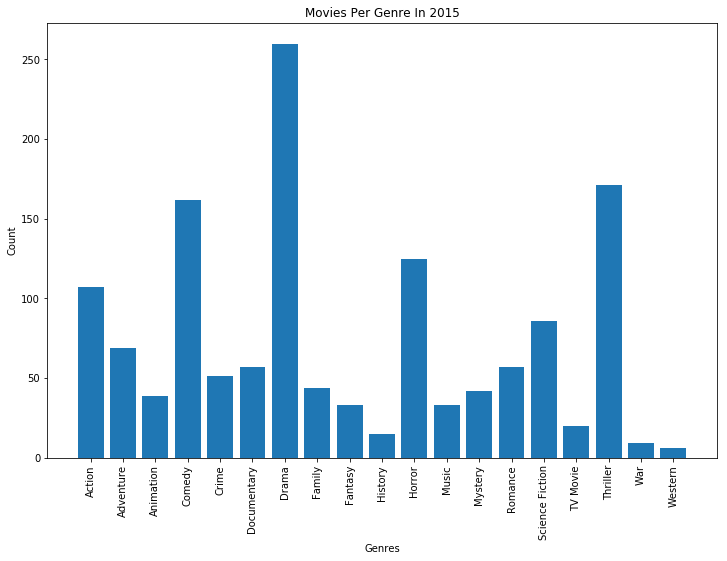

In [35]:
# create a bar plot movies per genres released in 2015
location = [ 'Action','Adventure','Animation', 'Comedy','Crime','Documentary', 'Drama', 'Family','Fantasy','History','Horror', 'Music','Mystery','Romance', 'Science Fiction',    
 'TV Movie','Thriller','War', 'Western',]
plt.figure(figsize=(12,8))
plt.bar(height=movies_in_2015, x=location)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Movies Per Genre In 2015')

## Question 3
## Will the Revenue of Movie Determine its Popularity?

Text(0.5,1,'Movies Revenue VS Movies Popularity')

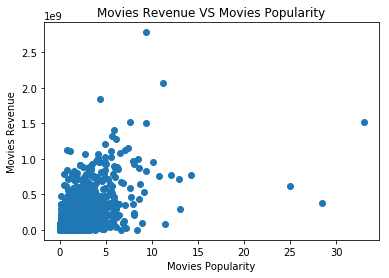

In [34]:
#create a scatter plot to compare movies populrity with it revenue
plt.scatter(data=df, x= 'popularity', y= 'revenue')
plt.xlabel('Movies Popularity')
plt.ylabel('Movies Revenue')
plt.title('Movies Revenue VS Movies Popularity')

## Does the Duration of movies affect their Rating?

Text(0.5,1,'Vote Average VS Movie Runtime')

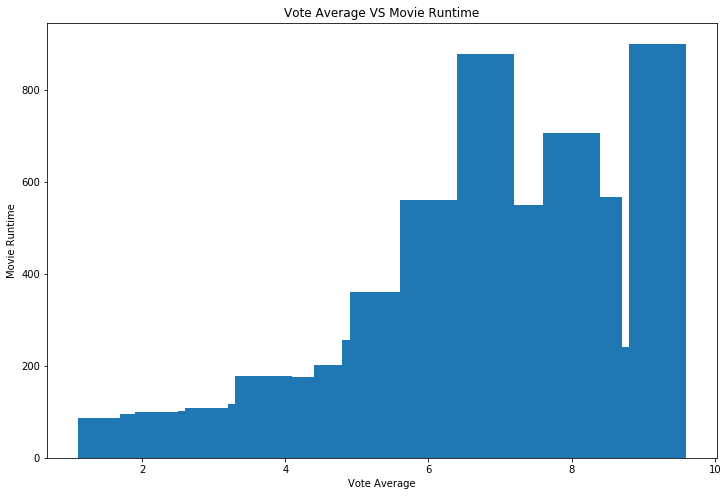

In [38]:
# plot a bar plot to show if movies are rated based on their runtime
plt.figure(figsize=(12,8))
x = df.vote_average
y = df.runtime
plt.bar(x,y)
plt.xlabel('Vote Average')
plt.ylabel('Movie Runtime')
plt.title('Vote Average VS Movie Runtime')

<a id='conclusions'></a>
## Conclusions

### From my findings i have been able to show that :

## 1. There has been an exponential increase in the prduction of movies over the years. 

## 2. Drama genre produced most movies in 2015 with a total of 260 movies.

## 3. Movies with lower Revenue has lower movie Rating and this translate that the popuarity of a movie does not determine the total income of a movie.

## 4. The Duration of movies does not determine their Ratings


### LIMITATIONS: 
## The cast column could have been cleaned by removing the '|' charater but it was not needed for our findings.
## The Movies Revenue VS Movies Popularity could have been plot with a bigger scale to enlarge the visualization.




In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0